# Configuração de ambiente

Importação das bibliotecas:
- Numpy: para manipulação de arrays
- Pandas: para manipulação de dataframes
- Matplotlib: para visualização de dados
- Seaborn: para visualização de dados

E dentre outras para o aprendizado não supervisionado.

In [158]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Leitura e visualização do dataset

Leitura do arquivo "dataset.csv" através da função "read_csv" do Pandas e armazenamento do resultado na variável "df". Uso do parâmetro "sep" para informar qual o separador de colunas do arquivo e do parâmetro "encoding" para informar qual o tipo de codificação do arquivo.

In [159]:
csv_url = "https://github.com/viniciusgugelmin/data-science-2/blob/master/projects/cursos-prouni/data/dataset_clean.csv?raw=true"

df = pd.read_csv(csv_url, sep=';', encoding='utf-8', low_memory=False)

Exibição das 5 primeiras linhas do DataFrame através da função "head" do Pandas para verificar se o arquivo foi carregado corretamente e ter uma ideia do que ele contém.

In [160]:
df.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00
1,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


Realizamos algumas visualizações de gráficos para entender qual a proporção e com o que estamos trabalhando.

In [161]:
hist =  px.histogram (df,  x = "turno", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição de turnos') 
hist.show()

In [162]:
df_uf_sort = df.copy()
df_uf_sort = df_uf_sort.sort_values(by=['uf_busca'], ascending=True)

hist =  px.histogram (df_uf_sort,  x = "uf_busca", nbins=60) 
hist.update_layout(width=1000,height=400,title_text='Distribuição de estados') 
hist.show()

Verificamos o total de linhas e colunas

In [163]:
df.shape

(41447, 20)

# Limpeza e troca de valores

Iniciamos a limpeza de colunas desnecessárias para o aprendizado e trocamos valores de texto usando o LabelEncoder para opções numéricas.

In [164]:
le = LabelEncoder()
df_new = df.copy()

df_new["grau"] = le.fit_transform(df_new.grau.values)
df_new["turno"] = le.fit_transform(df_new.turno.values)
df_new["curso_busca"] = le.fit_transform(df_new.curso_busca.values)
df_new["cidade_busca"] = le.fit_transform(df_new.cidade_busca.values)
df_new["uf_busca"] = le.fit_transform(df_new.uf_busca.values)
df_new["universidade_nome"] = le.fit_transform(df_new.universidade_nome.values)
df_new["campus_nome"] = le.fit_transform(df_new.campus_nome.values)
df_new["nome"] = le.fit_transform(df_new.nome.values)

df_new = df_new.drop(['cidade_filtro'], axis=1)
df_new = df_new.drop(['curso_id'], axis=1)
df_new = df_new.drop(['cidade_busca'], axis=1)
df_new = df_new.drop(['universidade_nome'], axis=1)
df_new = df_new.drop(['campus_nome'], axis=1)
df_new = df_new.drop(['campus_id'], axis=1)

df_new

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca,uf_busca,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,0,1,9999.99,15.0,14.0,0.0,0.0,210,11,210,740.22,726.46,0.00,0.00
1,0,3,9836.40,1.0,0.0,0.0,0.0,79,5,79,663.36,0.00,0.00,0.00
2,0,1,9715.61,2.0,5.0,6.0,10.0,210,25,210,739.62,738.08,738.96,718.64
3,0,3,9689.34,3.0,2.0,0.0,0.0,248,5,248,651.00,652.22,0.00,0.00
4,0,1,9674.34,4.0,1.0,5.0,2.0,210,0,210,758.32,723.94,734.92,711.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41442,1,0,149.00,1.0,0.0,0.0,0.0,281,26,281,502.36,0.00,0.00,0.00
41443,2,0,144.00,1.0,2.0,2.0,5.0,205,25,205,533.34,450.00,450.00,450.00
41444,2,4,139.00,1.0,0.0,0.0,0.0,169,6,169,580.76,0.00,0.00,0.00
41445,0,0,139.00,1.0,0.0,0.0,0.0,270,7,270,548.26,0.00,0.00,0.00


# Peparação para aplicação dos algoritmos

Pegamos uma amostra do dataset

In [165]:
df_ul = df_new.copy()
df_ul = df_ul.sample(frac = 0.1)

df_ul

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca,uf_busca,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
7804,2,3,964.81,1.0,0.0,0.0,0.0,255,4,255,592.88,0.00,0.00,0.00
1562,0,4,1611.14,0.0,0.0,0.0,50.0,91,13,91,0.00,0.00,490.74,0.00
33912,2,0,270.00,0.0,1.0,0.0,0.0,54,25,54,608.96,0.00,0.00,0.00
11714,1,2,749.04,2.0,1.0,2.0,51.0,76,5,76,621.84,599.70,450.00,521.02
10941,0,2,792.00,0.0,2.0,0.0,2.0,137,4,137,562.92,0.00,576.22,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,0,4,760.03,0.0,0.0,2.0,0.0,0,9,0,0.00,0.00,534.80,0.00
9683,0,3,858.00,1.0,7.0,0.0,0.0,248,23,248,601.92,547.72,0.00,0.00
26117,1,0,308.00,1.0,1.0,0.0,0.0,229,10,229,561.14,524.22,0.00,0.00
2498,0,4,1420.85,2.0,0.0,3.0,1.0,11,9,11,562.32,0.00,585.34,522.82


# Escalonamento

In [167]:
scale = StandardScaler()
df_scale = scale.fit_transform(df_ul)
df_scale

array([[ 1.29803557,  1.3224993 ,  0.62008907, ..., -0.79872753,
        -0.79500367, -0.3882919 ],
       [-0.98855918,  2.04330924,  1.75388076, ..., -0.79872753,
         1.08889738, -0.3882919 ],
       [ 1.29803557, -0.83993052, -0.5987462 , ..., -0.79872753,
        -0.79500367, -0.3882919 ],
       ...,
       [ 0.1547382 , -0.83993052, -0.53208662, ...,  1.08935731,
        -0.79500367, -0.3882919 ],
       [-0.98855918,  2.04330924,  1.42007416, ..., -0.79872753,
         1.45205718,  2.6163648 ],
       [-0.98855918, -0.83993052, -0.56371484, ..., -0.79872753,
         1.21596492, -0.3882919 ]])

# Dendograma

Vamos ver uma representação gráfica em forma de árvore (Dendograma) sobre a estrutura dos agrupamentos.

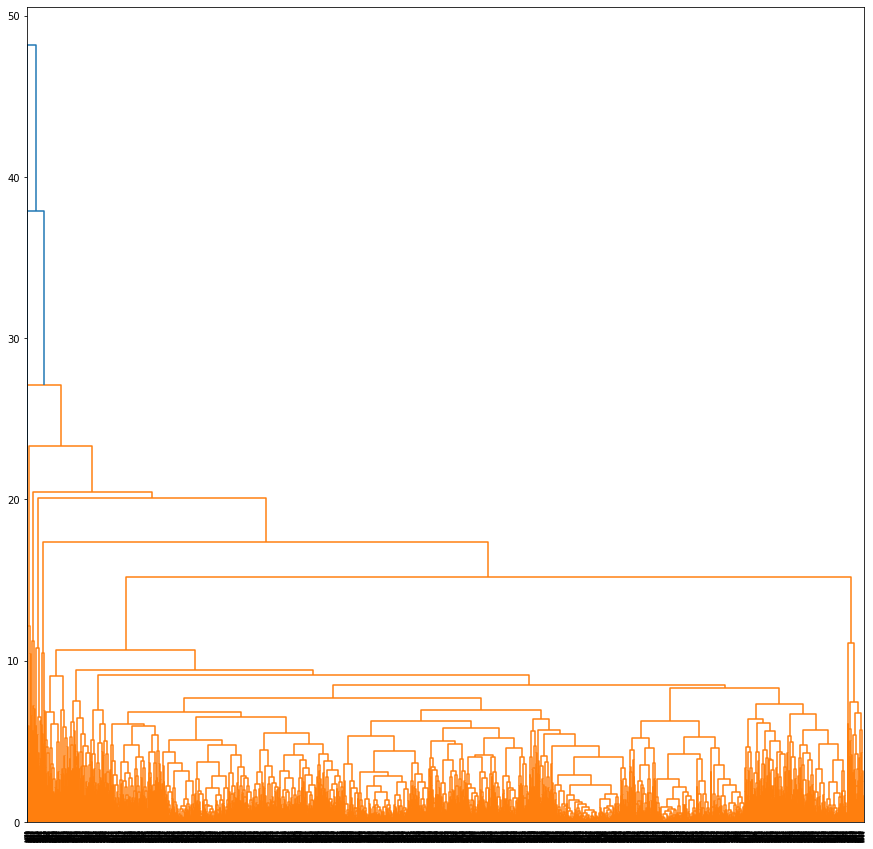

In [168]:
plt.figure(figsize=(15, 15))
df_dendrogram = dendrogram(linkage(df_scale, method = "complete"))

# Elbow Method

In [169]:
dados = df_ul.iloc[:, [2,3]].values

dados

array([[9.64810e+02, 1.00000e+00],
       [1.61114e+03, 0.00000e+00],
       [2.70000e+02, 0.00000e+00],
       ...,
       [3.08000e+02, 1.00000e+00],
       [1.42085e+03, 2.00000e+00],
       [2.89970e+02, 0.00000e+00]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



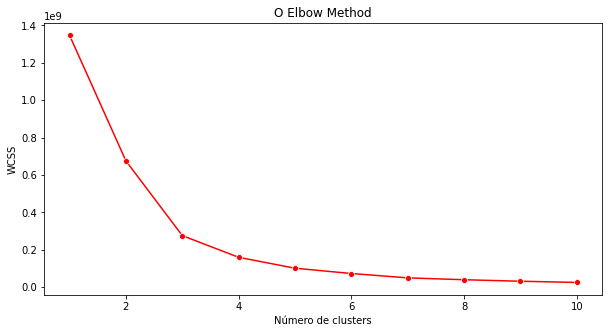

In [170]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)

    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('O Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

# Agrupamento

In [171]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)
kmeans1 = kmeans.fit(dados)
centroides = kmeans1.cluster_centers_
centroides

array([[9.29702418e+02, 1.69181818e+00],
       [1.71495128e+03, 1.44482759e+00],
       [6.26335750e+03, 2.68750000e+00],
       [3.33591062e+02, 9.23694779e-01]])

In [172]:
classificacao = kmeans1.labels_
classificacao

array([0, 1, 3, ..., 3, 1, 3], dtype=int32)

In [173]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.show()

In [174]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,0
1,1
2,3
3,0
4,0
...,...
4140,0
4141,0
4142,3
4143,1


In [175]:
df_group = pd.concat([df_new, agrupamento],axis=1)
df_group

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca,uf_busca,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,0,1,9999.99,15.0,14.0,0.0,0.0,210,11,210,740.22,726.46,0.00,0.00,0.0
1,0,3,9836.40,1.0,0.0,0.0,0.0,79,5,79,663.36,0.00,0.00,0.00,1.0
2,0,1,9715.61,2.0,5.0,6.0,10.0,210,25,210,739.62,738.08,738.96,718.64,3.0
3,0,3,9689.34,3.0,2.0,0.0,0.0,248,5,248,651.00,652.22,0.00,0.00,0.0
4,0,1,9674.34,4.0,1.0,5.0,2.0,210,0,210,758.32,723.94,734.92,711.26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41442,1,0,149.00,1.0,0.0,0.0,0.0,281,26,281,502.36,0.00,0.00,0.00,NaN
41443,2,0,144.00,1.0,2.0,2.0,5.0,205,25,205,533.34,450.00,450.00,450.00,NaN
41444,2,4,139.00,1.0,0.0,0.0,0.0,169,6,169,580.76,0.00,0.00,0.00,NaN
41445,0,0,139.00,1.0,0.0,0.0,0.0,270,7,270,548.26,0.00,0.00,0.00,NaN
